#**PROYECTO MACHINE LEARNING PULSAR**
Autor: Juan David Viana Duque




In [3]:
## Librerias necesarias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

import tensorflow as tf

## **Análisis preliminar de los datos**

**Carga de CSV**

In [19]:
df_pulsar = pd.read_csv('Pulsar.csv', sep=',', decimal='.')
df_pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


**Funciones usadas**

In [ ]:
#Funciones útiles

def graficarCorrelacion(df):
  corr_df = df.corr(method='pearson')
  plt.figure(figsize=(8, 6))
  sns.heatmap(corr_df, annot=True)
  plt.show()

def descripcionDatos(df):

  arrayna=df.isna().sum()
  descripcionGeneral=df.describe()

  return arrayna,descripcionGeneral


**Ánalisis de los datos y limpieza**

In [ ]:
tuplaResult=descripcionDatos(df_pulsar)
tuplaResult[0]

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [ ]:
tuplaResult[1]

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


Como se puede observar en este DataSet tenemos17898 filas, 8 columnas predictoras y una variable a estimar (class) con el fin de determinar si la onda es o no Pulsar.

Por otro lado , no tenemos datos na. Validamos entonces como se realacionan las variables:

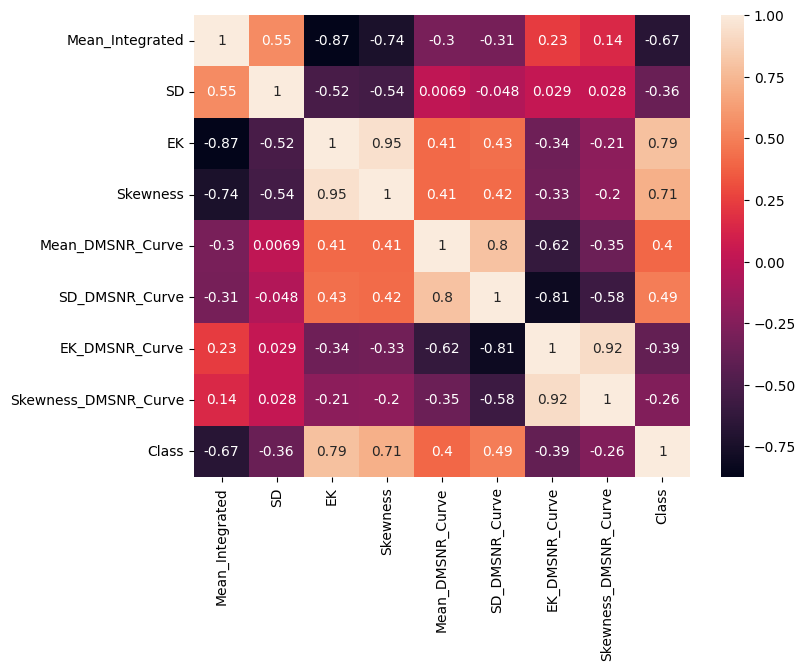

In [ ]:
graficarCorrelacion(df_pulsar)

In [ ]:
sns.pairplot(df_pulsar,hue="Class")


Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='Class', ylabel='count'>

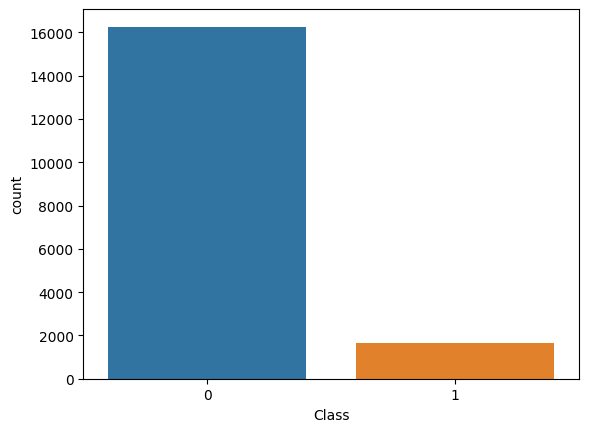

In [ ]:
sns.countplot(x = df_pulsar['Class'])

Se puede ver  de los gráficos de correlación que variables como **Skewness** y **mean_integrated** tienen una correlación fuerte , además de  **Skewness** y **EK**.En consecuencia a  lo anterior, se deberá escoger solo alguna de estas para no darle más complejidad al modelo de manera innecesaria.

Por  otro lado,se observa que variables como **EK**, **mean_integrated** y **Skewness** son buenas a simple vista para clasificar las ondas, seguramnente el modelo a desarrollar tendrá algunas de estas variables.

Finalmente se detecta un desbalanceo de datos (la mayoría NO son ondas Pulsar) por lo cual es importante evaluar la calidad del modelo a desarrollar en su capacidad para predecir positivos(1).

## **Entrenamiento y obtención del modelo**

Dividimos en test y validación

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False


In [5]:
import tensorflow as tf

In [ ]:

def entrenarTestearModelo(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  layer_norm = tf.keras.layers.Normalization(axis=-1) #Capa de normalización
  layer_norm.adapt(X_train)

  num_epochs = 15

  model = tf.keras.Sequential([
      layer_norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=num_epochs, verbose=2)

  predictions_test=model.predict(X_test,verbose=False)
  predictions_rounded=np.round(predictions_test,decimals=0)

  matriz = confusion_matrix(y_test, predictions_rounded)


  print('Exactitud:', (matriz[0,0]+matriz[1,1])/matriz.sum())
  print('Sensibilidad(¿Qué tan bien predice identificar un Pulsar?):',matriz[1,1]/(matriz[1,0]+matriz[1,1])*100)

  return matriz

In [ ]:
##X1=df_pulsar[['EK','Mean_Integrated','EK_DMSNR_Curve']]
##X2=df_pulsar[['Skewness','Mean_Integrated','SD_DMSNR_Curve']]
X3=df_pulsar[['EK','Mean_DMSNR_Curve','Skewness_DMSNR_Curve']]
y=df_pulsar['Class']

matriz=entrenarTestearModelo(X3,y)


Epoch 1/15
448/448 - 2s - loss: 0.0999 - accuracy: 0.9761 - 2s/epoch - 4ms/step
Epoch 2/15
448/448 - 1s - loss: 0.0733 - accuracy: 0.9788 - 821ms/epoch - 2ms/step
Epoch 3/15
448/448 - 1s - loss: 0.0721 - accuracy: 0.9791 - 829ms/epoch - 2ms/step
Epoch 4/15
448/448 - 1s - loss: 0.0723 - accuracy: 0.9786 - 825ms/epoch - 2ms/step
Epoch 5/15
448/448 - 1s - loss: 0.0715 - accuracy: 0.9788 - 828ms/epoch - 2ms/step
Epoch 6/15
448/448 - 1s - loss: 0.0711 - accuracy: 0.9795 - 874ms/epoch - 2ms/step
Epoch 7/15
448/448 - 1s - loss: 0.0716 - accuracy: 0.9781 - 877ms/epoch - 2ms/step
Epoch 8/15
448/448 - 1s - loss: 0.0711 - accuracy: 0.9786 - 814ms/epoch - 2ms/step
Epoch 9/15
448/448 - 1s - loss: 0.0710 - accuracy: 0.9790 - 781ms/epoch - 2ms/step
Epoch 10/15
448/448 - 1s - loss: 0.0712 - accuracy: 0.9793 - 1s/epoch - 2ms/step
Epoch 11/15
448/448 - 1s - loss: 0.0706 - accuracy: 0.9787 - 1s/epoch - 3ms/step
Epoch 12/15
448/448 - 1s - loss: 0.0711 - accuracy: 0.9790 - 1s/epoch - 2ms/step
Epoch 13/15
4

In [ ]:
X=df_pulsar[['EK','Mean_Integrated','EK_DMSNR_Curve']]
y=df_pulsar['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
layer_norm = tf.keras.layers.Normalization(axis=-1) #Capa de normalización
layer_norm.adapt(X_train)

Después de evaluar diferentes variables se seleccionan como predictoras: EK,Mean_DMSNR_Curve y Skewness_DMSNR_Curve

**Evaluación del learning rate**

In [ ]:
def movingLearningRate():
  initial_model = tf.keras.Sequential([
      layer_norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  initial_model.compile(
      loss=tf.keras.losses.binary_crossentropy,
      optimizer=tf.keras.optimizers.Adam(),
      metrics=[
          tf.keras.metrics.BinaryAccuracy(name='accuracy')
      ]
  )

  initial_history = initial_model.fit(
      X_train,
      y_train,
      epochs=100,
      callbacks=[
          tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-3 * 10 ** (epoch / 30)
          )
      ]
  )

  return initial_history

def plotMetric(history):
  plt.plot(np.arange(1, 101), initial_history.history['loss'], label='Loss', lw=3)
  plt.plot(np.arange(1, 101), initial_history.history['accuracy'], label='Accuracy', lw=3)
  plt.plot(np.arange(1, 101), initial_history.history['lr'], label='Learning rate', color='#000', lw=3, linestyle='--')
  plt.title('Evaluation metrics', size=20)
  plt.xlabel('Epoch', size=14)
  plt.legend()


Epoch 1/100
448/448 [==============================] - 6s 6ms/step - loss: 0.1007 - accuracy: 0.9780 - lr: 0.0010
Epoch 2/100
448/448 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9796 - lr: 0.0011
Epoch 3/100
448/448 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9797 - lr: 0.0012
Epoch 4/100
448/448 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9795 - lr: 0.0013
Epoch 5/100
448/448 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9794 - lr: 0.0014
Epoch 6/100
448/448 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9800 - lr: 0.0015
Epoch 7/100
448/448 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9796 - lr: 0.0016
Epoch 8/100
448/448 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9793 - lr: 0.0017
Epoch 9/100
448/448 [==============================] - 1s 3ms/step - loss: 0.0686 - accu

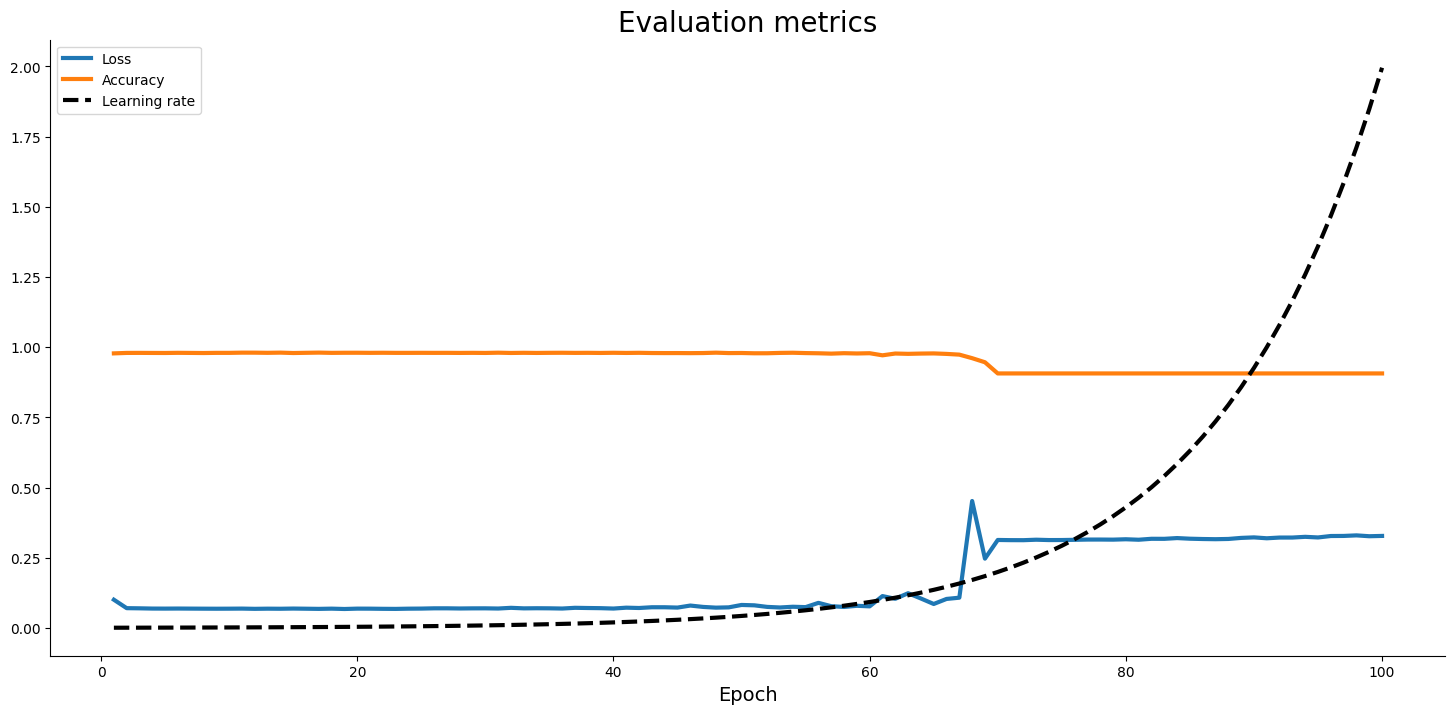

In [ ]:
initial_history=movingLearningRate()
plotMetric(initial_history)

Como se observa el modelo converje muy rápido, es decir que con pocos epochs podria entrenarse

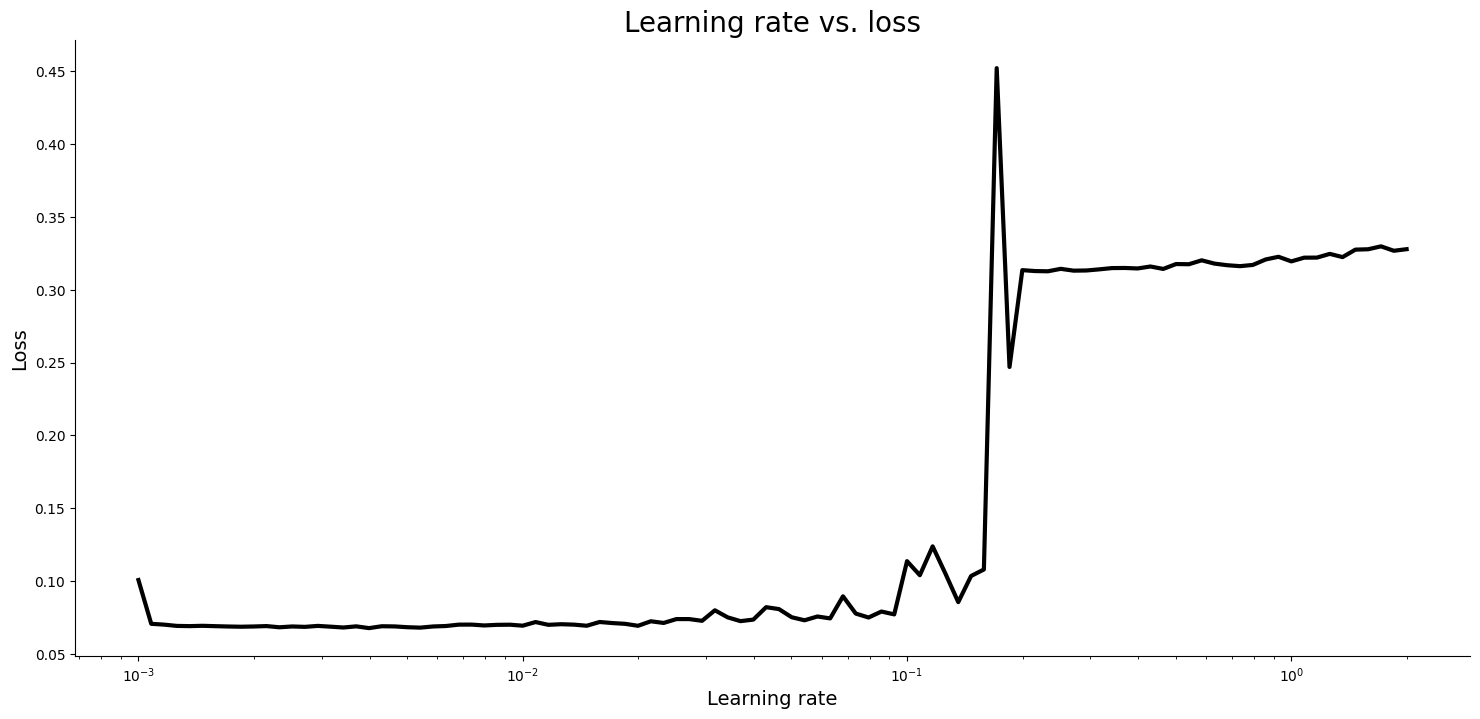

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(learning_rates, initial_history.history['loss'], lw=3, color='#000')
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14)
plt.savefig('lr_vs_loss.jpg', dpi=300, bbox_inches='tight');

De acuerdo a lo anterior un learning rate entre 0.003 y 0.01 podría funcionar,escogeremos 0.005

**Entrenamiento final**

In [ ]:
def entrenarTestearModeloFinal(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  layer_norm = tf.keras.layers.Normalization(input_dim=3,axis=-1) #Capa de normalización
  layer_norm.adapt(X_train)
  num_epochs = 15

  model = tf.keras.Sequential([
      layer_norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),metrics=['accuracy'])

  model.fit(X_train, y_train, epochs=num_epochs, verbose=2)

  predictions_test=model.predict(X_test,verbose=False)
  predictions_rounded=np.round(predictions_test,decimals=0)

  matriz = confusion_matrix(y_test, predictions_rounded)


  print('Exactitud:', (matriz[0,0]+matriz[1,1])/matriz.sum())
  print('Sensibilidad(¿Qué tan bien predice identificar un Pulsar?):',matriz[1,1]/(matriz[1,0]+matriz[1,1])*100)

  return model

In [ ]:
X3=df_pulsar[['EK','Mean_DMSNR_Curve','Skewness_DMSNR_Curve']]
y=df_pulsar['Class']
modeloFinal=entrenarTestearModeloFinal(X3,y)

Epoch 1/15
448/448 - 2s - loss: 0.0871 - accuracy: 0.9756 - 2s/epoch - 4ms/step
Epoch 2/15
448/448 - 1s - loss: 0.0771 - accuracy: 0.9777 - 789ms/epoch - 2ms/step
Epoch 3/15
448/448 - 1s - loss: 0.0752 - accuracy: 0.9777 - 994ms/epoch - 2ms/step
Epoch 4/15
448/448 - 1s - loss: 0.0740 - accuracy: 0.9783 - 1s/epoch - 3ms/step
Epoch 5/15
448/448 - 1s - loss: 0.0752 - accuracy: 0.9788 - 1s/epoch - 3ms/step
Epoch 6/15
448/448 - 1s - loss: 0.0738 - accuracy: 0.9786 - 852ms/epoch - 2ms/step
Epoch 7/15
448/448 - 1s - loss: 0.0728 - accuracy: 0.9793 - 797ms/epoch - 2ms/step
Epoch 8/15
448/448 - 1s - loss: 0.0734 - accuracy: 0.9790 - 851ms/epoch - 2ms/step
Epoch 9/15
448/448 - 1s - loss: 0.0737 - accuracy: 0.9790 - 835ms/epoch - 2ms/step
Epoch 10/15
448/448 - 1s - loss: 0.0732 - accuracy: 0.9788 - 809ms/epoch - 2ms/step
Epoch 11/15
448/448 - 1s - loss: 0.0723 - accuracy: 0.9791 - 877ms/epoch - 2ms/step
Epoch 12/15
448/448 - 1s - loss: 0.0721 - accuracy: 0.9790 - 823ms/epoch - 2ms/step
Epoch 13/1

Finalmente se pudo obtener un modelo con una  sensibillidad del **83.43%** y una exactitud de **97.73%** aproximadamente.

In [ ]:
modeloFinal.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 3)                7         
 tion)                                                           
                                                                 
 dense_38 (Dense)            (None, 128)               512       
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17,160
Trainable params: 17,153
Non-trainable params: 7
_________________________________________________________________


In [ ]:
#Exportacion
modeloFinal.save('modelPulsar.h5')

In [7]:
model = tf.keras.models.load_model('modelPulsar.h5')

In [12]:
df_pulsar[df_pulsar['Class']==1]

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1
...,...,...,...,...,...,...,...,...,...
17515,89.867188,47.482295,1.591325,2.505057,0.763378,12.393561,17.940745,333.902630,1
17529,27.039062,33.754722,4.779124,26.255357,129.863712,78.815440,-0.348492,-0.893791,1
17558,77.070312,39.000638,1.884421,6.372178,38.517559,65.741059,1.589513,1.285346,1
17642,28.375000,27.649311,6.377273,45.944048,141.860368,82.893017,-0.477222,-1.067880,1


In [18]:
model.predict([[5.770087,73.112876,1.082920]])

1/1 [==============================] - 0s 29ms/step


array([[0.99958503]], dtype=float32)